FILE: history_jandenawer09_1704760526.3265.json
FILE: history_jandenawer09_1704760883.815535.json
FILE: history_jandenawer09_1704761232.224689.json
FILE: history_jandenawer09_1704762319.207423.json
FILE: history_jandenawer09_1704762928.534497.json
FILE: history_jandenawer09_1704763531.594619.json
FILE: history_jandenawer09_1704768821.866438.json
FILE: history_jandenawer09_1704842438.513015.json


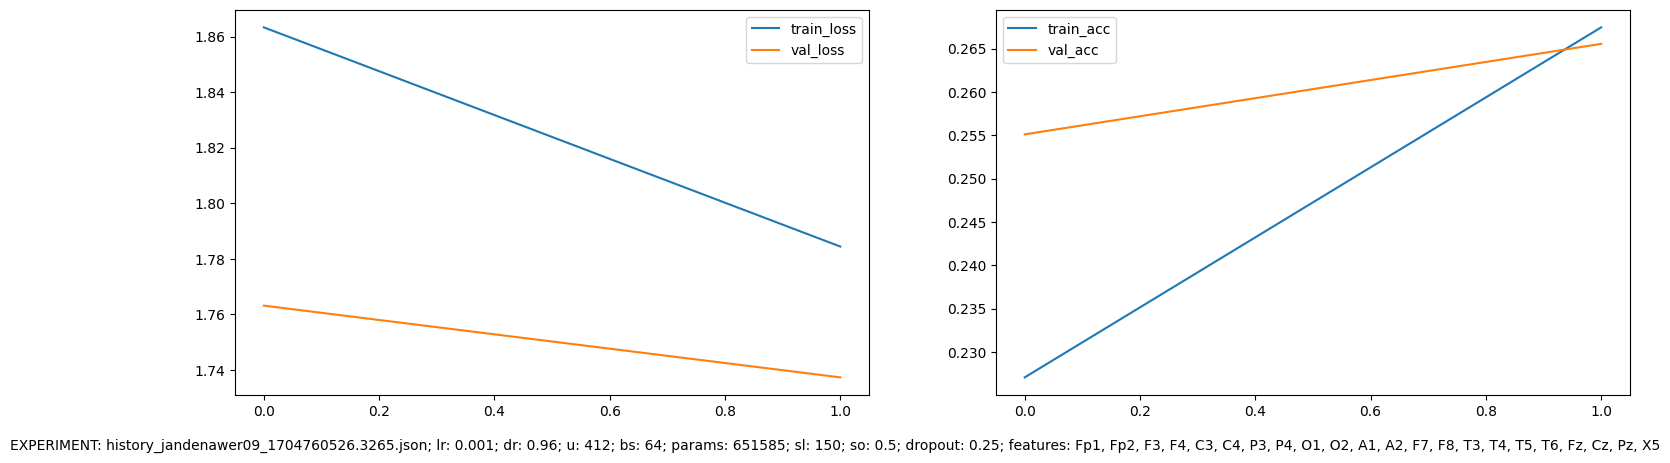

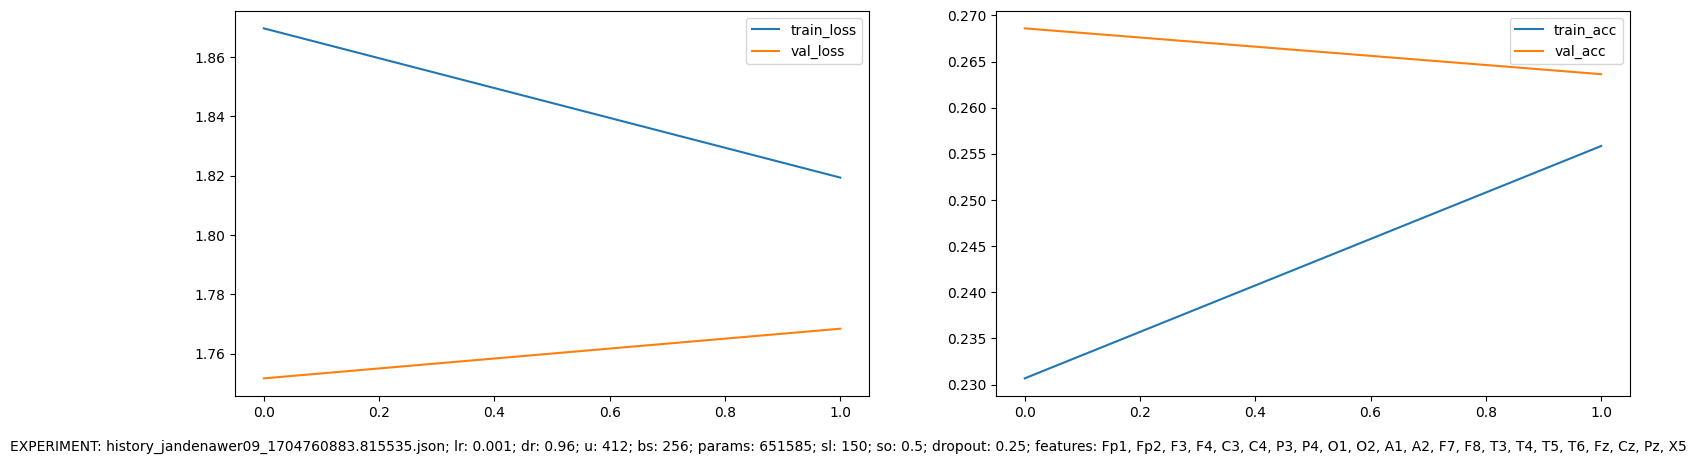

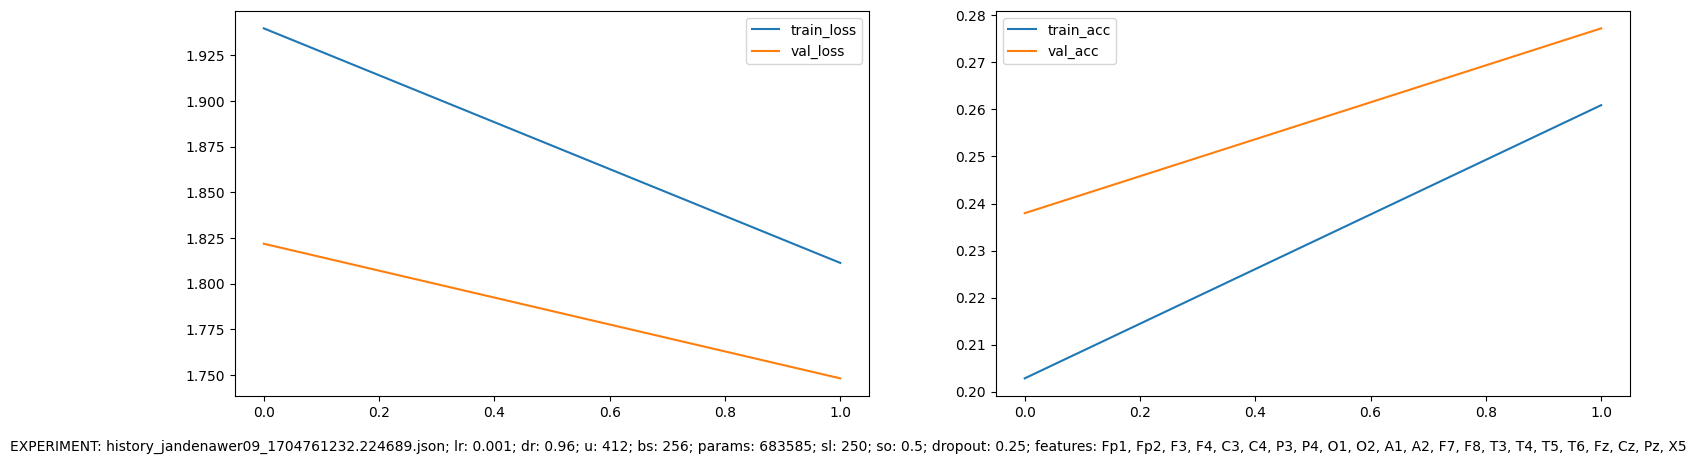

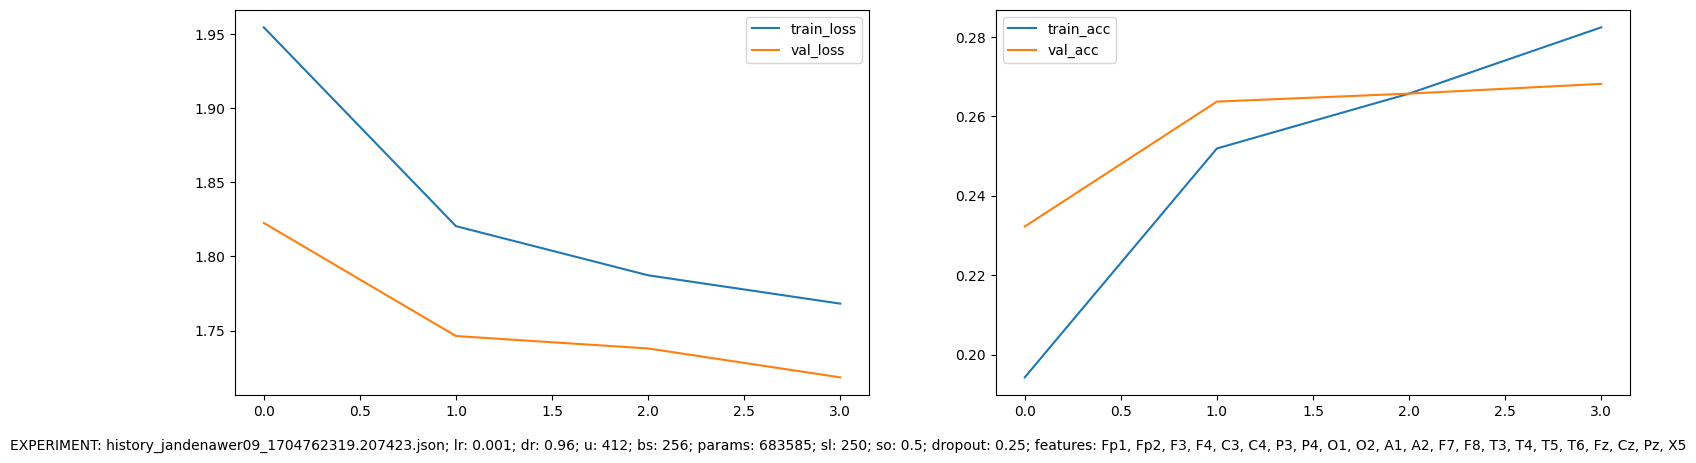

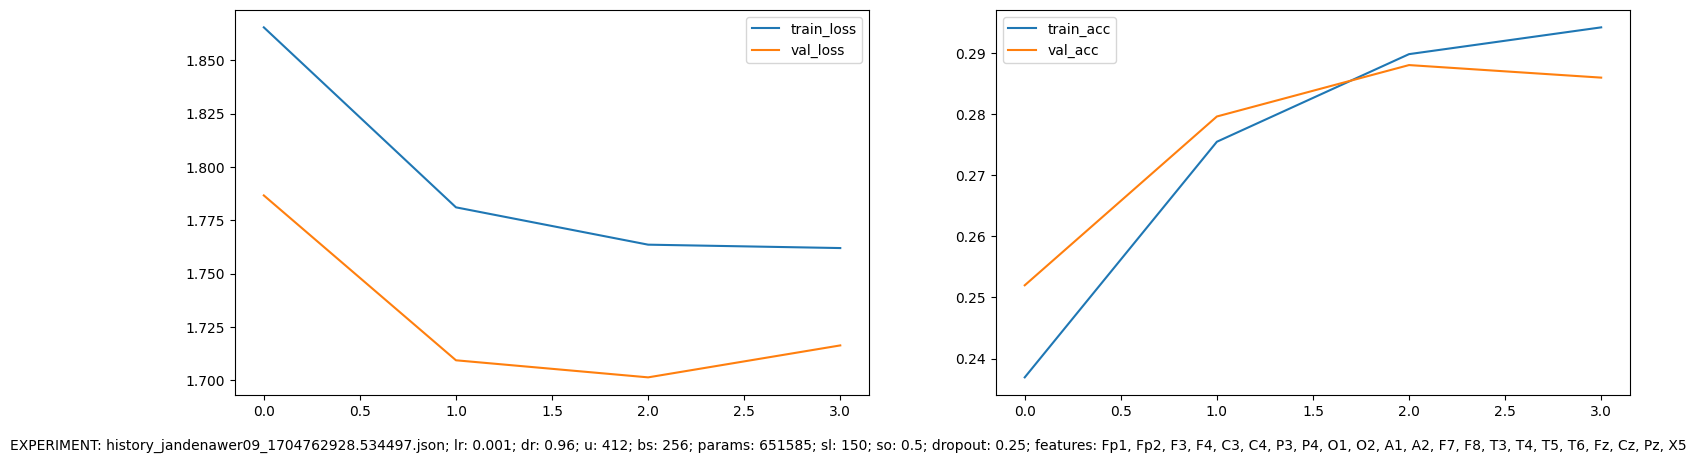

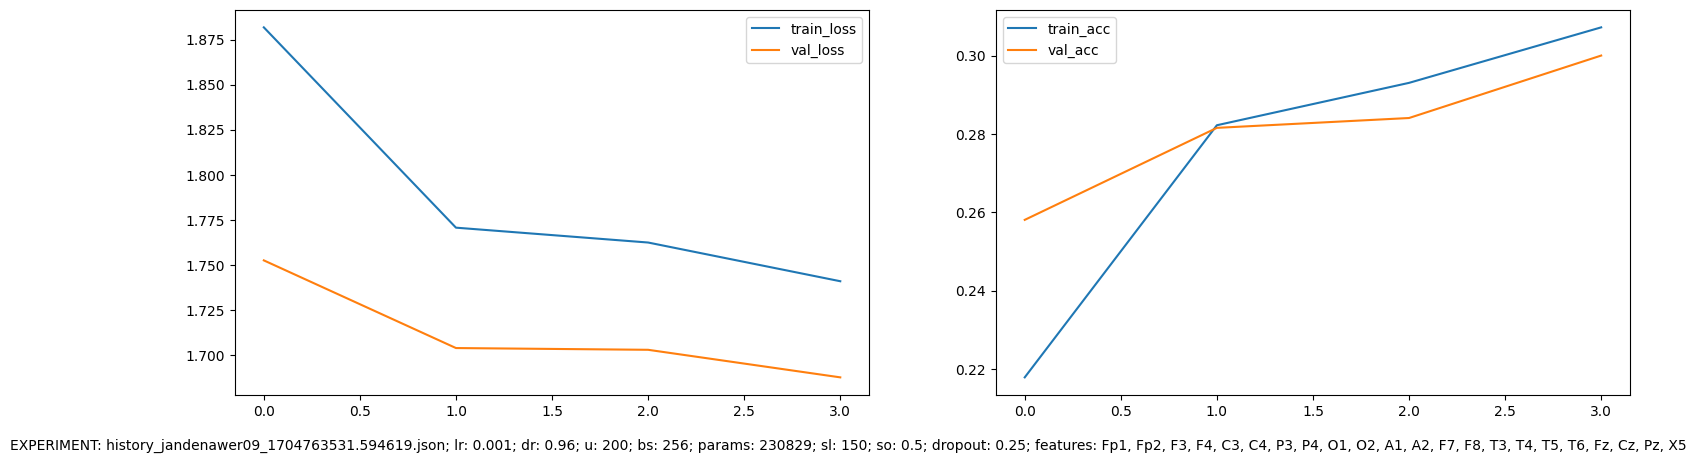

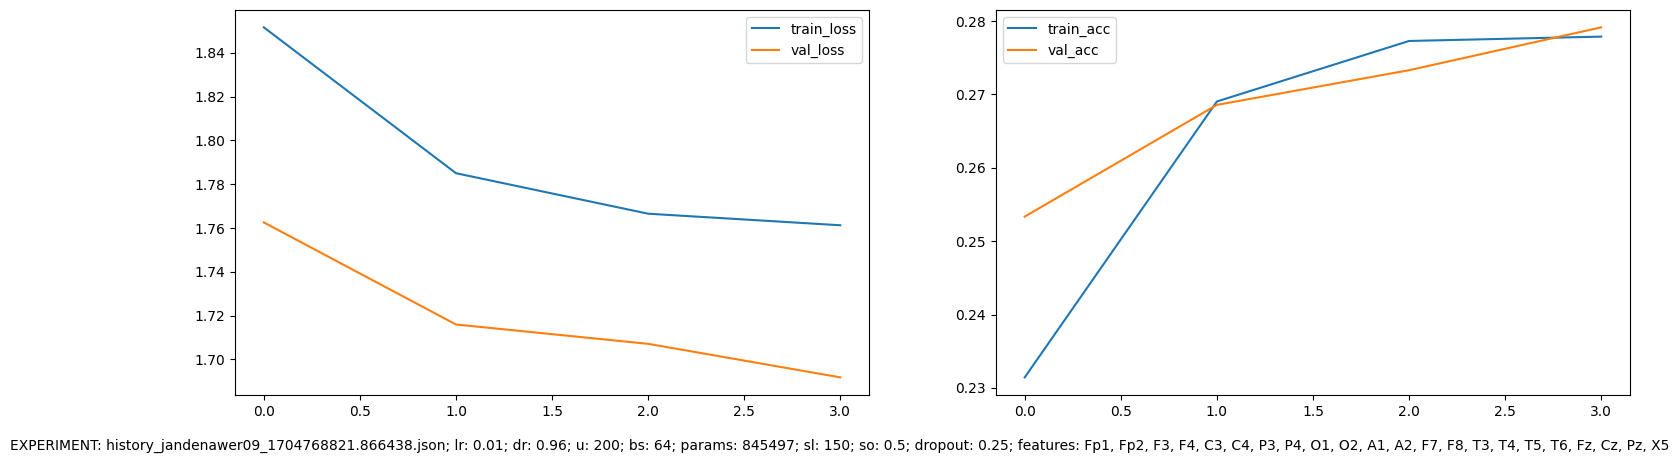

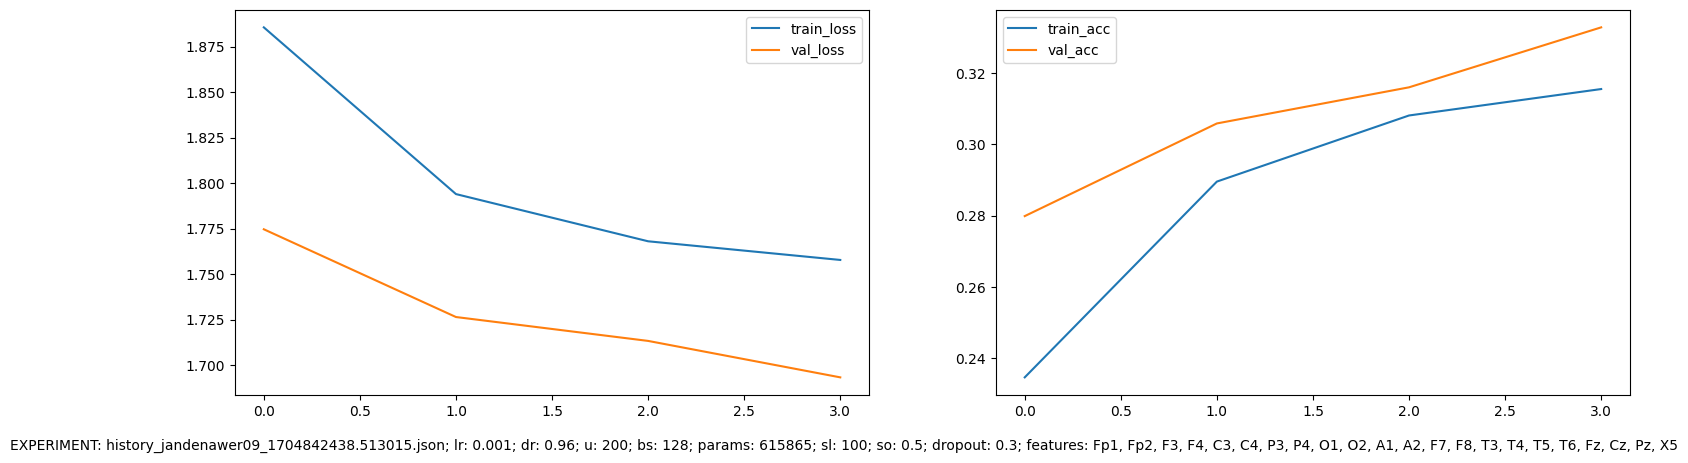

In [1]:
import json
import matplotlib.pyplot as plt
import os

LOGS_PATH = '../log/framework'

def plot_results(train_log: dict, name: str):
    epoch_data = train_log.get('train_history', [])

    val_loss = []
    val_acc = []
    train_loss = []
    train_acc = []

    for epoch_log in epoch_data:
        val_loss.append(epoch_log['val']['loss'])
        val_acc.append(epoch_log['val']['acc'])
        train_loss.append(epoch_log['train']['loss'])
        train_acc.append(epoch_log['train']['acc'])

    num_epochs = range(len(epoch_data))

    dr = train_log.get('decay_rate')
    bs = train_log.get('batch_size')
    lr = train_log.get('learning_rate')
    u = train_log.get('units')
    params = train_log.get('num_params')
    sl = train_log.get('sequence_length')
    so = train_log.get('sequence_overlap')
    dropout = train_log.get('dropout')
    features = ', '.join(train_log.get('features', []))

    title = f'EXPERIMENT: {name}; lr: {lr}; dr: {dr}; u: {u}; bs: {bs}; params: {params}; sl: {sl}; so: {so}; dropout: {dropout}; features: {features}'

    plt.figure(figsize=(18, 5))
    plt.figtext(0, 0, title)
    plt.subplot(121)
    plt.plot(num_epochs, train_loss, label='train_loss')
    plt.plot(num_epochs, val_loss, label='val_loss')
    plt.legend()
    plt.subplot(122)
    plt.plot(num_epochs, train_acc, label='train_acc')
    plt.plot(num_epochs, val_acc, label='val_acc')
    plt.legend()


for file in sorted(os.listdir(LOGS_PATH)):
    if file.endswith('.json'):
        log_file_path: str = os.path.join(LOGS_PATH, file)
        with open(log_file_path) as f:
            train_log = json.load(f)
            print(f'FILE: {file}')
            plot_results(train_log, file)